In [4]:
from pydantic import BaseModel
from typing import List, Optional, Union, Set
from app import create_app, db
from app.models import Akteur, Doc as Document
from pathlib import Path
import seaborn as sns
from logzero import setup_logger
import os

os.environ["FLASK_CONFIG"] = 'development'

app = create_app('default')
app.app_context().push()

In [2]:
# sample = [Document.query.filter_by(id=id).one() for id in s]
sample = [Document.query.filter_by(id=48254).one()]

In [6]:
from app.src.d01_ana.analysis import Config, Analysis

settings_analysis = {
    'debug': False,
    'sample': sample,
    'clf_model': 'joeddav/xlm-roberta-large-xnli',
#     'corpus': ['plenar'],
    'pipeline': ['extensions', 'sentiment', 'entity', 'res', 'spans', 'clf']
    }

content_analysis = Analysis('test', Config(**settings_analysis))
content_analysis(to_disk=False, to_db=False)
res = content_analysis.get_results()
res.prepare(post=True)
# res.df.sort_values(by='score', ascending=False)

Some weights of the model checkpoint at joeddav/xlm-roberta-large-xnli were not used when initializing XLMRobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 180/180 [02:36<00:00,  1.15it/s]


In [8]:
import pandas as pd
df_valid = pd.read_csv('app/data/CA_validity.csv')

In [9]:
y_pred = [1 if i > 0.0 else 0 for i in res.df.score]
y_true = [1 if i > 0.0 else 0 for i in df_valid.populism]

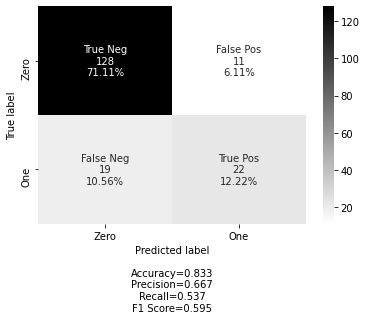

In [11]:
from sklearn.metrics import confusion_matrix
import numpy as np

cf_matrix = confusion_matrix(y_true, y_pred)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')

In [14]:
from spacy import displacy

def visualize(id):
    viz = res.viz[res.labels.index(id)]
    doc = Document.query.filter(Document.id == id).one()
    ex, options = res.render(doc.text, f"{doc.id} | {doc.autor.name} | {doc.date} | {doc.id}", viz, pres=True, online=True)
    displacy.render(ex, style="ent", manual=True, jupyter=True, options=options)

In [16]:
visualize(4316)

(0, 5828)


In [13]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

df = res.df
df['valid'] = y_true
df['pred'] = y_pred
df

,doc,doclen,score,PEOPLE,ATTR,ELITE_STANDALONE,ELITE,E,EA,V,VA,valid,pred
0,1829,474,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0
1,22159,127,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0
2,18365,211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0
3,12088,751,84.933933,34.887435,27.591353,0.000000,22.455146,22.455146,27.591353,34.887435,0.0,1,1
4,4316,832,63.074318,4.642500,47.235519,0.000000,11.196298,11.196298,47.235519,4.642500,0.0,0,1
5,28711,877,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0
6,15852,1018,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0
7,1785,647,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0
8,20751,838,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0
9,7176,48,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0


In [31]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_true, y_pred)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [16]:
from sqlalchemy import and_
import random

sample = []

for party in parties:
    for korpus in korpora:
        subkorpus = Document.query.filter(and_(Document.autor.has(Akteur.party == party), Document.corpus.like(korpus))).all()
        stichprobe = random.sample(subkorpus, 10)
        sample.extend(stichprobe)
        
print(len(sample))

210


In [5]:
sample_ids = """1829
22159
18365
12088
4316
28711
15852
1785
20751
7176
49405
48721
49741
48254
12055
48961
48885
48600
48580
47603
62252
77563
63990
76198
80212
59383
69385
69384
59074
60592
35095
29732
12650
28812
5915
21366
39865
39495
27009
30812
57242
55491
58047
55484
58205
55467
58687
58102
57812
58610
61275
79939
59153
80839
66155
68832
71504
79901
63584
61324
36274
36298
30501
35527
40783
40607
33110
33852
40561
36798
52292
50191
52429
50357
51627
50376
52274
50421
51150
50898
80971
77401
84834
80747
82885
82079
83184
78632
82920
79661
31596
3134
4009
27833
34750
7923
9752
14082
15536
15497
41140
44138
42965
43318
41910
45764
45362
45533
42382
41527
77842
79194
79772
80051
77854
81716
61431
74587
79531
65897
3860
25685
26348
19488
25660
8908
5695
24962
25909
5657
53008
53620
53026
53328
53276
53019
52681
52794
53294
52917
61701
65273
73562
65556
75314
65275
66411
80459
62163
80487
54491
32861
33161
29713
39051
32461
34235
32130
34634
33420
54908
54475
54810
54103
54021
53813
54015
55031
54556
55018
62073
84771
71576
60249
81681
75286
64906
60307
84265
61206"""

s = sample_ids.split('\n')
s = [int(i) for i in s]
sample = [Document.query.filter_by(id=id).one() for id in s]

In [52]:
# from pprint import pprint

# for doc in sample:
#     autor = doc.autor
#     print(doc.id, autor.name, autor.party)
#     print()
#     print(doc.text)
#     print()
#     pprint(doc.text)
#     print()